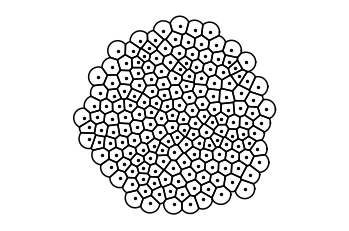

In [341]:
from Organoid2D import Organoid
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

org = Organoid()
org.evolution(T=0.001, file = 'organoid_mid.csv', mode='transcription')
org.cellPlot()

-0.2294922617689558


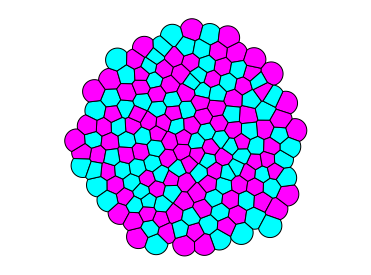

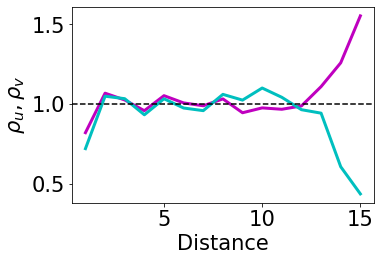

In [353]:
org.mesh = {}

# Number of lines in that dimension which cut through the organoid
Nx = 13
Ny = 13

x = np.linspace(np.min(org.xy[:,0]) - org.r_max/2, np.max(org.xy[:,0]) + org.r_max/2, Nx+2)
y = np.linspace(np.min(org.xy[:,1]) - org.r_max/2, np.max(org.xy[:,1]) + org.r_max/2, Ny+2)

org.G = np.zeros(org.nofCells)
for i in range(Nx+1):
    for j in range(Ny+1):
        if (i+j)%2 == 0:
            org.G[(x[i] <= org.xy[:,0]) & (org.xy[:,0] < x[i+1]) & (y[j] <= org.xy[:,1]) & (org.xy[:,1] < y[j+1])] = 1   

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

#im = plt.imread('test.png')

fig=plt.figure()
org.pcf(font_size = 14*3/2, lw = 3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

0.7757160425813705


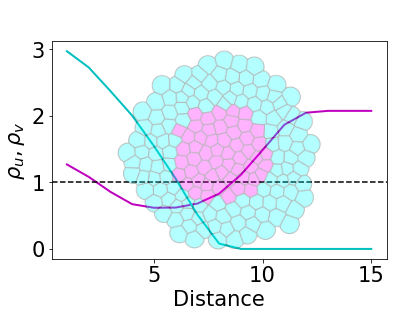

In [99]:
im = plt.imread('test.png')

fig=plt.figure()
org.pcf(font_size = 14*3/2)
newax = fig.add_axes([.0,.0,1,1], zorder=1)
newax.imshow(im, alpha = 0.3)
newax.axis('off')

org.moran()
print(org.Morans_I)

0.7757160425813704


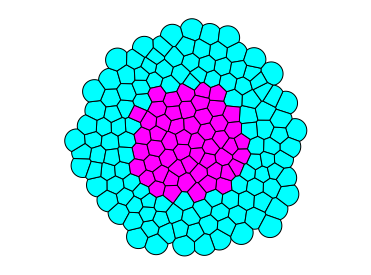

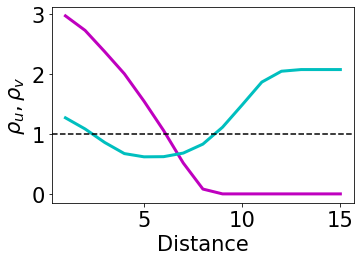

In [360]:
center = np.mean(org.xy, axis=0)
norm = ((org.xy[:,0]-center[0])**2 + (org.xy[:,1]-center[1])**2)**0.5
r_max = np.max(norm)

Nr = 1
r = np.linspace(0,r_max,Nr+2)

org.G = np.zeros(org.nofCells)
for i in range(Nr+1):
    if i%2 == 0:
        org.G[(r[i] < norm) & (norm <= r[i+1])] = 1

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
#plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.pdf', transparent = True)

#im = plt.imread('test.png')
#
fig=plt.figure()
org.pcf(font_size = 14*3/2, lw=3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')

plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

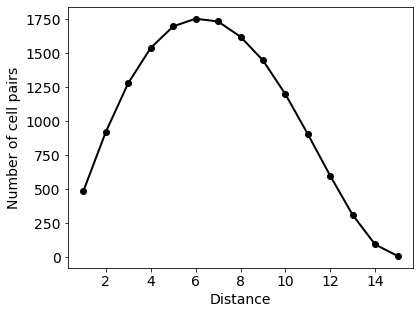

In [256]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)

pairs = np.empty(int(np.max(org.GraphDist)))
for i in range(len(pairs)):
    pairs[i] = len(org.GraphDist[org.GraphDist == i+1])/2
    
distances = list(range(1,len(pairs)+1))

plt.plot(distances, pairs, lw = 2, marker='o', color='k')
plt.gcf().subplots_adjust(left=0.15)
plt.xlabel('Distance')
plt.ylabel('Number of cell pairs')
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.pdf', transparent = True)

0.8571428571428571


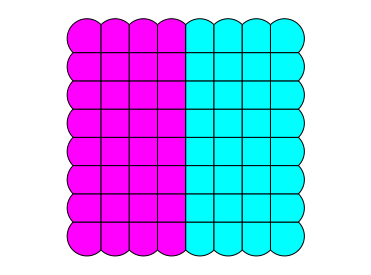

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import pandas as pd

Nx = 8
d = 1

xy = np.empty([Nx*Nx, 2])
for i in range(Nx):
    for j in range(Nx):
        xy[i*Nx+j] = [j*d, i*d]
        
def neighbors(i, N):
    ix = i%N
    iy = int((i-ix)/N)
    
    if int(i/N)%2 == 0:
        ilr = - 1
    else:
        ilr = 1
    
    # above
    n1 = (iy + 1)*N + (ix + 0)%N
    
    # same row 
    n2 = (iy + 0)*N + (ix + 1)%N
    n3 = (iy + 0)*N + (ix - 1)%N
    
    # below
    n4 = (iy - 1)*N + (ix + 0)%N
    
    return [n1%N**2,n2%N**2,n3%N**2,n4%N**2]
        
def fate_distribution(org, dist_type):
    if dist_type == 'random':
        org.N = np.round(np.random.random(org.nofCells))
    if dist_type == 'cluster':
        center = np.mean(org.xy, axis=0)
        org.N = np.zeros(org.nofCells)
        org.N[org.xy[:,0] -  center[0] < 0] = 1
    if dist_type == 'checkerboard':
        for i in range(Nx):
            for j in range(Nx):
                if (i+j)%2==0:
                    org.N[i*Nx+j] = 1
    
    org.G = 1 - org.N
    
    return

import pandas as pd
df = pd.DataFrame()
df['x-Position'] = xy[:,0]
df['y-Position'] = xy[:,1]
df['Radius'] = np.ones(len(xy))*0.7
df.to_csv('8x8.csv', index = False)

from Organoid2D import Organoid

org = Organoid()
org.GraphDist = np.zeros([len(xy), len(xy)])
for i in range(len(xy)):
    org.GraphDist[i, neighbors(i, Nx)] = 1
    
org.evolution(T=0.001, file='8x8.csv', mode="transcription")

fate_distribution(org, 'cluster')

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.cellPlot(org.N, size=0)

org.moran()
print(org.Morans_I)

plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.pdf', transparent = True)

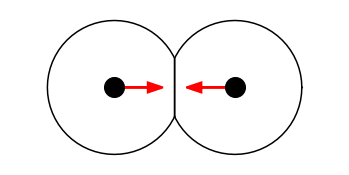

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from Organoid2D import Organoid

org = Organoid()
d = 0.9
org.xy = np.array([[-d,0],[d,0]])
org.r = np.array([1, 1])
org.nofCells = 2
org.dist = cdist(org.xy, org.xy)

plt.figure()
org.cellPlot(size = 400)
#plt.axis('on')
for xy in org.xy:
    if d < 0.7:
        plt.arrow(xy[0], xy[1], np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
    if d > 0.7 and d < 1:
        plt.arrow(xy[0], xy[1], -np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
plt.axis('square')
plt.xlim([-2.5,2.5])
plt.ylim([-1.2,1.2])

plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.pdf', transparent = True)

In [210]:
np.sign(-2)

-1

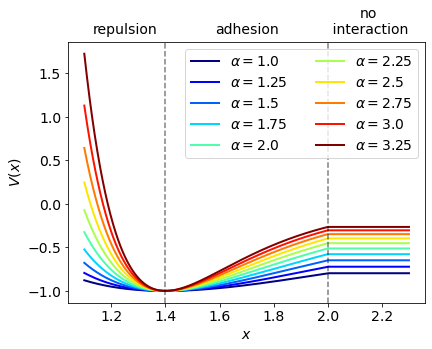

In [206]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')

def morse_potential(x, a, σ):
    V = np.exp(-2*a*(x - σ*2)) - 2*np.exp(-a*(x - σ*2))
    V[x >= 2] = np.exp(-2*a*(2 - σ*2)) - 2*np.exp(-a*(2 - σ*2))
    return V

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_potential(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V(x)$")

y0, y1 = plt.ylim()
y = y1 + .03*(abs(y0)+abs(y1))
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.pdf', transparent = True)

2.21 -5.0 2.0


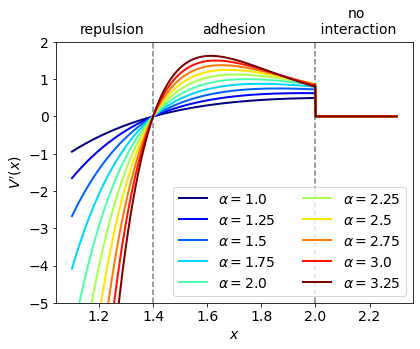

In [238]:
def morse_force(x, a, σ):
    F = - 2*a*np.exp(-2*a*(x - σ*2)) + 2*a*np.exp(-a*(x - σ*2))
    F[x >= 2] = 0
    return F

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_force(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V'(x)$")

y0, y1 = plt.ylim([-5,2])
y = y1 + .03*(abs(y0)+abs(y1))
print(y, y0, y1)
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.pdf', transparent = True)

### Cell division distance using Lambert W function <span style="color:red">(does not work since function argument is $-<\frac{1}{e}$)</span>

-0.09969792046063913 -0.36787944117144233
-0.06870494983790335 -0.36787944117144233
-0.054482661416751066 -0.36787944117144233
-0.04891085200377088 -0.36787944117144233
-0.047982405417245966 -0.36787944117144233
-0.04961289525424915 -0.36787944117144233
-0.05267941765222728 -0.36787944117144233
-0.05656224972204125 -0.36787944117144233
-0.06091345070883331 -0.36787944117144233
-0.06553522843973264 -0.36787944117144233


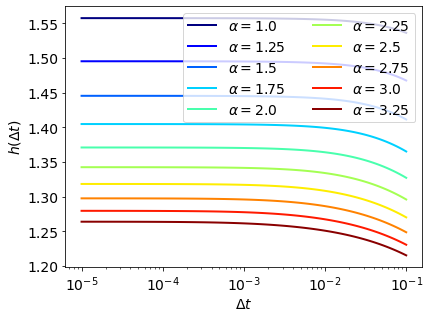

In [356]:
from scipy.special import lambertw

a = 1
F0 = .1
r = 0.95/2**(1/3)
s = 0.7

DT = np.logspace(-5,-1,K)

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,.99,N)

K = 100
DT = np.logspace(-5,-1,K)
plt.figure(figsize=[6.4, 4.8])

plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        rhs = - 2*A[i]*F0*DT[j] + np.exp(-2*A[i]*s*r) + np.log(1 - np.exp(-2*A[i]*s*r))
        x = np.log(-lambertw(-np.exp(rhs-1))+1)
        H[j] = np.real(x/A[i] + 2*s*r)
    
    print(rhs, -1/np.exp(1))
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2)

### Cell division distance using nonlinear solver

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered 

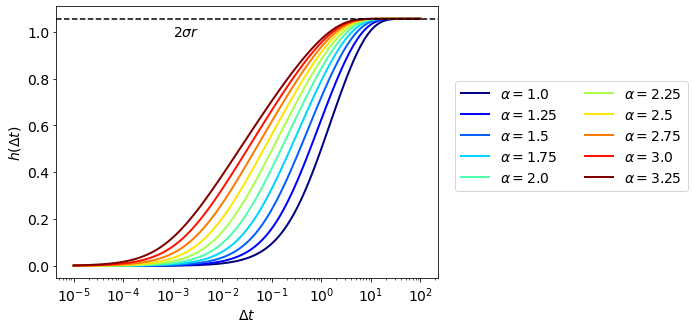

In [462]:
from scipy.optimize import fsolve

a = 1
F0 = .1
r = 0.95/2**(1/3)
sigma = 0.7

f = lambda h, dt, a: 2*a*F0*dt + np.exp(a*(h-2*r*sigma)) + np.log(1 - np.exp(a*(h-2*r*sigma))) \
                    - np.exp(a*(-2*r*sigma)) - np.log(1 - np.exp(a*(-2*r*sigma)))

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,1,N)

K = 100
DT = np.logspace(-5,2,K)

plt.figure(figsize=[11, 4.8])
plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        F = lambda h: f(h, DT[j], A[i])
        dF = lambda h: -A[i]*np.exp(A[i]*(h-2*r*sigma))/(np.exp(-A[i]*(h-2*r*sigma))-1)
        H[j] = fsolve(F, 1.9999*sigma*r, fprime=dF)
        
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.text(0.001,2*sigma*r - 0.075,"$2 \\sigma r$")
plt.axhline(2*sigma*r, linestyle='dashed', color='k', zorder=10)
plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(1.35, .75))

#plt.gcf().subplots_adjust(right=0.5)
plt.tight_layout()

plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.pdf', transparent = True)

In [453]:
print(a)
print(F0)
print(r)
print(sigma)

1
0.1
0.7540154996848947
0.7


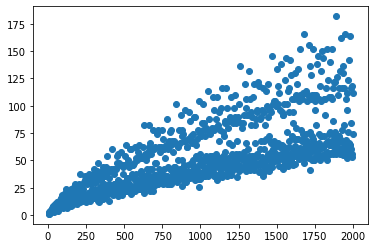

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def find_primes(N):
    primes = [2]
    for i in range(3, N+1):
        isprime = 1
        for p in primes:
            if i not in primes:
                if i%p == 0:
                    isprime = 0
                    break

        if isprime:
            primes.append(i)
              
    return np.array(primes)

def find_decompositions(n, P):
    count = 0
    P = P[P < n]
    for p1 in P:
        for p2 in P:
            if p1 + p2 == n:
                count += 1

    return count

def goldbach(N):
    P = find_primes(N)
    
    x = np.array(list(range(4,N+1,2)))
    G = np.empty(len(x))
    for i in range(len(x)):
        G[i] = find_decompositions(x[i], P)
        
    return x, G

N = 2000
x, G = goldbach(N)
plt.scatter(x, G)

In [13]:
find_primes(10000)

array([   2,    3,    5, ..., 9949, 9967, 9973])

array([1, 0, 1, 0], dtype=int32)